<h1 align='center'> 영상처리 프로그래밍 실습 3</h1>

<h6 align='right'> 2022. 3. 24. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   &nbsp;&nbsp;          학번:    &nbsp;&nbsp;         학과(전공):
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 3월 30일 (수) 오후 6:00까지 최종본을 SmartLEAD제출


In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.5
NumPy version 1.22.3


## 예제 1. 영상의 반전

###  8-비트 양자화 흑백 영상의 반전

한 화소가 8-비트로 양자화된 2차원 흑백 영상 $f(x,y)$의 반전 영상 $g(x,y)$는 다음과 같이 표현된다.

$$g(x,y) = 255 - f(x,y)$$

'tree-1.jpg' 파일을 읽고, 흑백 영상으로 변환한 후에 흑백영상과 이 흑백영상의 반전 영상을 화면에 나란히 표시하는 프로그램을 작성하라.

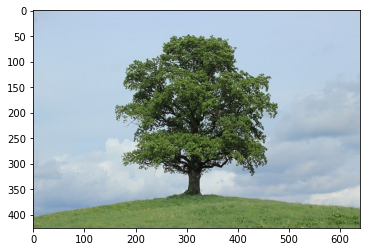

In [10]:
img = mpimg.imread('tree-1.jpg')
plt.imshow(img)
plt.show()

In [11]:
img = cv2.imread('tree-1.jpg')

In [12]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

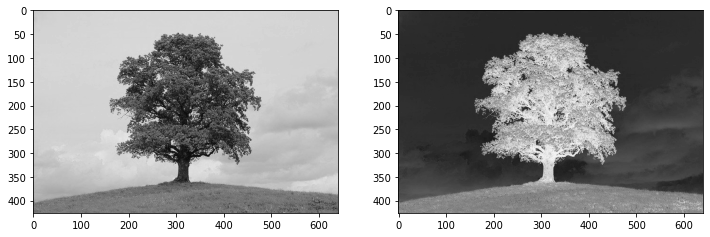

In [16]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.subplot(122)
plt.imshow(255-img_gray, cmap='gray')
plt.show()

### 컬러 영상의 반전

'tree-1.jpg' 파일을 읽고, 이 영상과 이 영상의 반전 영상을 화면에 나란히 표시하는 프로그램을 작성하라.


In [17]:
img = cv2.imread('tree-1.jpg')
img_reverse = 255-img

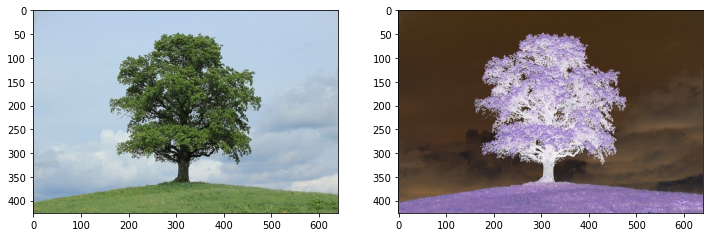

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(img_reverse[:,:,::-1])

## 예제 2. 

tree-1.jpg 파일을 읽고, cv2.imshow 함수를 이용하여 영상을 새 윈도우에 표시하고, 왼쪽 마우스 버튼을 클릭하면 흑백 영상을 표시하고, 오른쪽 마우스를 누르면 컬러 영상을 표시하고, 'q'를 입력하면 프로그램을 종료하는 프로그램을 작성하라.

In [22]:
def onMouseClick(event, x, y, flags, param):
    if(event == cv2.EVENT_LBUTTONUP):
        cv2.imshow(winName, img_gray)
    elif(event == cv2.EVENT_RBUTTONUP):
        cv2.imshow(winName, img)

img = cv2.imread('tree-1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
winName = 'tree'
cv2.imshow(winName, img)
cv2.setMouseCallback(winName, onMouseClick)

while cv2.waitKey(0) != ord('q'):
    pass

cv2.destroyAllWindows()

## 예제 3. 

tree-1.jpg 파일을 읽고, cv2.imshow 함수를 이용하여 영상을 새 윈도우에 표시하고, 왼쪽 마우스 버튼을 클릭하면 흑백반전 영상을 표시하고, 오른쪽 마우스를 누르면 원 영상을 표시하고, 'q'를 입력하면 프로그램을 종료하는 프로그램을 작성하라.

In [23]:

def onMouseClickInvert(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONUP:
        cv2.imshow(winName, img_gray_invert)
    elif event == cv2.EVENT_RBUTTONUP:
        cv2.imshow(winName, img)

img = cv2.imread('tree-1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray_invert = 255 - img_gray

winName = 'tree'

cv2.imshow(winName, img)
cv2.setMouseCallback(winName, onMouseClickInvert)
while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()


## 예제 4. 

tree-1.jpg 파일을 읽고, cv2.imshow 함수를 이용하여 영상을 새 윈도우에 표시하고, 왼쪽 마우스 버튼을 클릭할 때마다 흑백 영상과 흑백 반전 영상을 번갈아 가면서 표시하고, 오른쪽 마우스 버튼을 클릭할 때마다 컬러 영상과 컬러 반전 영상을 번갈아 가면서 표시하고, 'q'를 입력하면 프로그램을 종료하는 프로그램을 작성하라.

In [24]:
def onMouseClickColorGrayInvert(event, x, y, flags, param):
    global colorState, grayState
    if event == cv2.EVENT_LBUTTONUP:
        if grayState == 'NORMAL':
            cv2.imshow(winName, img_gray_invert)
            grayState = 'INVERT'
        elif grayState == 'INVERT':
            cv2.imshow(winName, img_gray)
            grayState = 'NORMAL'

    elif event == cv2.EVENT_RBUTTONUP:
        if colorState == 'NORMAL':
            cv2.imshow(winName, img_invert)
            colorState = 'INVERT'
        elif colorState == 'INVERT':
            cv2.imshow(winName, img)
            colorState = 'NORMAL'


img = cv2.imread('tree-1.jpg')
img_invert = 255-img
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray_invert = 255-img_gray

colorState = 'NORMAL'
grayState = 'NORMAL'

winName = 'tree'
cv2.imshow(winName, img)
cv2.setMouseCallback(winName, onMouseClickColorGrayInvert)

while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()

## Weighted sum of two images

$$g(x,y) = \alpha f_1(x,y) + (1-\alpha )f_2(x,y), \;\; 0 \le \alpha \le 1$$

## 예제 5: 지난 주 문제 1.

가중치 $\alpha$를 1부터 0까지 0.01 간격으로 변경해 가면서, 4 영상의 weighted sum을 구하고 화면에 표시하는 프로그램을 작성하라.

영상의 순서는 tree-1 --> tree-2 --> tree-3 --> tree-4 --> tree-1

단, 영상과 영상 사이의 디스플레이 간격은 0.5초로 설정하라.


In [25]:
img_tree1 = mpimg.imread('tree-1.jpg')
img_tree2 = mpimg.imread('tree-2.jpg')
img_tree3 = mpimg.imread('tree-3.jpg')
img_tree4 = mpimg.imread('tree-4.jpg')

#img = img_tree1.copy()
winname = "Weighted Sum of images"
cv2.imshow(winname, img_tree1)
cv2.waitKey(0)

images = [img_tree1, img_tree2, img_tree3, img_tree4, img_tree1]
for n in range(len(images)-1):
    for alpha in np.arange(0, 1.0, 0.01):
        img = ((1-alpha)*images[n] + alpha*images[n+1]).astype(np.uint8)
        cv2.imshow(winname, img)
        cv2.waitKey(500)
cv2.destroyAllWindows()

## 예제 6.

OpenCV의 waitKey 함수를 이용하여 예제 1에서 영상이 변화 과정을 반수동으로 변경할 수 있도록 프로그램을 수정하라.

단, 입력한 키에 따른 동작은 다음과 같다.

- '1': $\alpha = 0. \rightarrow 1.00$,  tree-1 $\rightarrow$ tree-2
- '2': $\alpha = 0. \rightarrow 1.00$,  tree-2 $\rightarrow$ tree-3
- '3': $\alpha = 0. \rightarrow 1.00$,  tree-3 $\rightarrow$ tree-4
- '4': $\alpha = 0. \rightarrow 1.00$,  tree-4 $\rightarrow$ tree-1
- 'q': 프로그램 종료



In [32]:
def mix_images(n):
    if 0 <= n < 100:
        alpha = n / 100
        img = (alpha*img_tree1 + (1-alpha)*img_tree2).astype(np.uint8)
        
    elif n < 200:
        alpha = (n - 100) / 100
        img = (alpha*img_tree2 + (1-alpha)*img_tree3).astype(np.uint8)
        
    elif n < 300:
        alpha = (n - 200) / 100
        img = (alpha*img_tree3 + (1-alpha)*img_tree4).astype(np.uint8)
        
    elif n < 400:
        alpha = (n - 300) / 100
        img = (alpha*img_tree4 + (1-alpha)*img_tree1).astype(np.uint8)
        
    cv2.imshow(winName, img)

img_tree1 = mpimg.imread('tree-1.jpg')
img_tree2 = mpimg.imread('tree-2.jpg')
img_tree3 = mpimg.imread('tree-3.jpg')
img_tree4 = mpimg.imread('tree-4.jpg')

#img = img_tree1.copy()
winName = "Weighted Sum of images"
cv2.imshow(winName, img_tree1)
while True:
    input_key = cv2.waitKey(0)
    if input_key == ord('q'):
        break
    elif input_key == ord('1'):
        start = 0
        N = 100
    elif input_key == ord('2'):
        start = 100
        N = 200
    elif input_key == ord('3'):
        start = 200
        N = 300
    elif input_key == ord('4'):
        start = 300
        N = 400
    
    for i in range(start,N):
        cv2.waitKey(10)
        mix_images(i)

cv2.destroyAllWindows()


## 예제 7.

OpenCV의 trackbar를 사용하여 예제 1에서 영상이 변화 과정을 수동으로 변경할 수 있도록 프로그램을 수정하라.

단, Trackbar의 범위를 0부터 400까지 설정하고, trackbar에서 1이 변하면 $\alpha$ 값이 0.01이 변하도록 변환하라. trackbar의 변환 범위는 다음과 같다.

- Trackbar $= 0 \rightarrow 100$:   $\alpha = 0. \rightarrow 1.00$,  tree-1 $\rightarrow$ tree-2
- Trackbar $= 100 \rightarrow 200$: $\alpha = 0. \rightarrow 1.00$,  tree-2 $\rightarrow$ tree-3
- Trackbar $= 200 \rightarrow 300$: $\alpha = 0. \rightarrow 1.00$,  tree-3 $\rightarrow$ tree-4
- Trackbar $= 300 \rightarrow 400$: $\alpha = 0. \rightarrow 1.00$,  tree-4 $\rightarrow$ tree-1

그리고 'q'를 누르면 프로그램이 종료되어야 한다.

In [34]:

def mix_images(n):
    if 0 <= n < 100:
        alpha = n / 100
        img = (alpha*img_tree1 + (1-alpha)*img_tree2).astype(np.uint8)
        
    elif n < 200:
        alpha = (n - 100) / 100
        img = (alpha*img_tree2 + (1-alpha)*img_tree3).astype(np.uint8)
        
    elif n < 300:
        alpha = (n - 200) / 100
        img = (alpha*img_tree3 + (1-alpha)*img_tree4).astype(np.uint8)
        
    else:
        alpha = (n - 300) / 100
        img = (alpha*img_tree4 + (1-alpha)*img_tree1).astype(np.uint8)
        
    cv2.imshow(winName, img)

mg_tree1 = mpimg.imread('tree-1.jpg')
img_tree2 = mpimg.imread('tree-2.jpg')
img_tree3 = mpimg.imread('tree-3.jpg')
img_tree4 = mpimg.imread('tree-4.jpg')
#img = img_tree1.copy()
winName = "Weighted Sum of images"
cv2.imshow(winName, img_tree1)

cv2.createTrackbar('step', winName, 0, 400, mix_images)

while cv2.waitKey(0) != ord('q'):
    pass

cv2.destroyAllWindows()

## 예제 8. 영상 자르기

In [35]:
file_name = 'bird.png'
img = cv2.imread(file_name)
img.shape

(425, 640, 3)

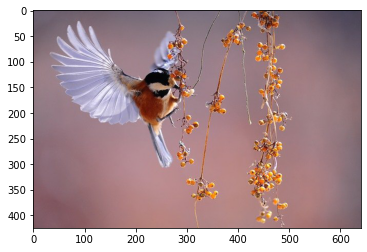

In [38]:
plt.imshow(img[:,:,::-1])

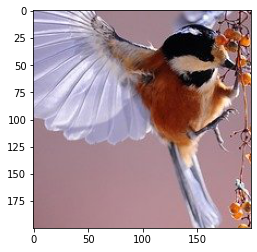

In [54]:
plt.imshow(img[100:300,100:300,::-1])

In [39]:
img_new = img.copy()
img_new = cv2.rectangle(img_new, (300,150),(450,250),(255,255,255))

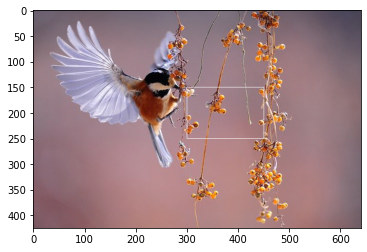

In [40]:
plt.imshow(img_new[:,:,::-1])

## 문제 1.

예제 8의 프로그램을 다음과 같이 수정하라.

1. 'Image' 윈도우에서 마우스 왼쪽 버튼을 클릭하면 그 위치가 하얀색 창의 왼쪽 위 꼭지점의 좌표를 지정하게 되고, 흰색 창의 크기가 변하고 흰색 창에 포함된 영상이 'Cropped' 윈도우에 표시된다.

2. 'Image' 윈도우에서 마우스 오른쪽 버튼을 클릭하면 그 위치가 하얀색 창의 오른쪽 아래 꼭지점의 좌표를 지정하게 되고, 흰색 창의 크기가 변하고 흰색 창에 포함된 영상이 'Cropped' 윈도우에 표시된다.

3. 'Cropped' 윈도우에서 왼쪽 마우스 버튼을 클릭하면 사용자에게 저장할 파일 이름을 입력받아서 'Cropped' 윈도우에 표시된 영상 부분을 별도의 파일로 저장한다.

In [16]:
def onMouseClickRectangle(event, x, y, flags, param):
    global xy_spot, isClicked, LUP, RUP, img_cropped
    if event == cv2.EVENT_LBUTTONUP:
        xy_spot[0] = x,y
        isClicked = isClicked | LUP

    elif event == cv2.EVENT_RBUTTONUP:
        xy_spot[1] = x,y
        isClicked = isClicked | RUP
        if isClicked == 3:
            img_copy = img.copy()
            img_copy = cv2.rectangle(img_copy, xy_spot[0],xy_spot[1], [255,255,255])
            img_cropped = img[xy_spot[0][1]:xy_spot[1][1],xy_spot[0][0]:xy_spot[1][0]]
            cv2.imshow(winName1, img_copy)
            cv2.imshow(winName2, img_cropped)
            cv2.setMouseCallback(winName2, clickToSave)
            isClicked = 0

def clickToSave(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONUP:
        save_name = input("저장할 파일 이름 : ")+ ".png"
        cv2.imwrite(save_name, img_cropped)

img = cv2.imread('bird.png')
img_cropped = img.copy()

winName1 = 'Image'
winName2 = 'Croppedd'

xy_spot = [[],[]]
isClicked = 0
LUP = 1
RUP = 2

cv2.imshow(winName1, img)
cv2.setMouseCallback(winName1, onMouseClickRectangle)

cv2.waitKey(0)
cv2.destroyAllWindows()